In [ ]:
# PERCENT OF ARRESTS BY UNIT NUMBER
# ARRESTS BY OFFICER ID
# PERCENT OF RACE ARRESTS BY OFFICER
# ZIP CODES WITH HIGHEST NUMBER OF ARRESTS

In [125]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn import preprocessing, metrics, ensemble
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 200)

In [71]:
df_clean = pd.read_csv('ISR_data_clean.csv',low_memory=False)
df_clean.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,...,STOLEN_PROPERTY_I,SEARCH_PROPERTY_I,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,...,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20410351,INVSTG,ISR000410351,01-JAN-2018 00:08,0,2523,N,"GRAY HOODED SWEATER, JEANS",NaN,JB100012,...,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
3,20410338,INVSTG,ISR000410338,01-JAN-2018 00:10,0,6738,N,"BLACK LONGSLEEVE SHIRT, GREY JEANS",Y,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORCHESTRA ALBANY
4,20410352,INVSTG,ISR000410352,01-JAN-2018 00:30,0,0767,N,"WHITE SOX HAT, BLACK JACKET, BLACK JEANS",Y,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# PERCENT OF ARRESTS BY UNIT NUMBER
# get binary to represent arrest

arrest_count = df_clean[['ENFORCEMENT_TYPE_CD', 'SUBMITTING_UNIT', 'SUBMITTING_BEAT_CD', 'CREATED_BY', 'RACE_CODE_CD', 'FO_EMPLOYEE_ID', 'SO_EMPLOYEE_ID', 'SUPV_EMPLOYEE_ID']]

In [73]:
arrest_count['TARGET'] = np.where(arrest_count['ENFORCEMENT_TYPE_CD'] == 'ARR', 1, 0)
arrest_count.head(20)

/Users/mac/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ENFORCEMENT_TYPE_CD,SUBMITTING_UNIT,SUBMITTING_BEAT_CD,CREATED_BY,RACE_CODE_CD,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,TARGET
0,NaN,25,2523,185285,WWH,185285,845723.0,184324.0,0
1,NaN,25,2523,675642,WWH,675642,845723.0,184324.0,0
2,NaN,25,2523,185285,WWH,185285,845723.0,184324.0,0
3,NaN,313,6738,469481,WWH,469481,767063.0,225434.0,0
4,NaN,7,0767,666758,BLK,666758,816630.0,517843.0,0
5,NaN,7,0767,666758,BLK,666758,816630.0,517843.0,0
6,NaN,7,0767,666758,BLK,666758,816630.0,517843.0,0
7,NaN,7,0767,666758,BLK,666758,816630.0,517843.0,0
8,ARR,14,1461,555358,BLK,555358,614048.0,621961.0,1
9,ARR,14,1461,555358,BLK,555358,614048.0,621961.0,1


In [74]:
# remove lines missing SO_EMPLOYEE_ID
arrest_count.dropna(subset = ["SO_EMPLOYEE_ID"], axis=0, inplace=True)
arrest_count.info()

/Users/mac/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243702 entries, 0 to 290144
Data columns (total 9 columns):
ENFORCEMENT_TYPE_CD    54485 non-null object
SUBMITTING_UNIT        243702 non-null int64
SUBMITTING_BEAT_CD     243702 non-null object
CREATED_BY             243702 non-null int64
RACE_CODE_CD           243702 non-null object
FO_EMPLOYEE_ID         243702 non-null int64
SO_EMPLOYEE_ID         243702 non-null float64
SUPV_EMPLOYEE_ID       243628 non-null float64
TARGET                 243702 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 18.6+ MB


In [75]:
# remove lines missing SUPV_EMPLOYEE_ID
arrest_count.dropna(subset = ["SUPV_EMPLOYEE_ID"], axis=0, inplace=True)
arrest_count.info()

/Users/mac/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243628 entries, 0 to 290144
Data columns (total 9 columns):
ENFORCEMENT_TYPE_CD    54463 non-null object
SUBMITTING_UNIT        243628 non-null int64
SUBMITTING_BEAT_CD     243628 non-null object
CREATED_BY             243628 non-null int64
RACE_CODE_CD           243628 non-null object
FO_EMPLOYEE_ID         243628 non-null int64
SO_EMPLOYEE_ID         243628 non-null float64
SUPV_EMPLOYEE_ID       243628 non-null float64
TARGET                 243628 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 18.6+ MB


In [76]:
#  drop enforcement type, since it informs target

arrest_count.drop(columns = ["ENFORCEMENT_TYPE_CD"], axis=0, inplace=True)
arrest_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243628 entries, 0 to 290144
Data columns (total 8 columns):
SUBMITTING_UNIT       243628 non-null int64
SUBMITTING_BEAT_CD    243628 non-null object
CREATED_BY            243628 non-null int64
RACE_CODE_CD          243628 non-null object
FO_EMPLOYEE_ID        243628 non-null int64
SO_EMPLOYEE_ID        243628 non-null float64
SUPV_EMPLOYEE_ID      243628 non-null float64
TARGET                243628 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 16.7+ MB


In [77]:
# EDA before we move on to the model

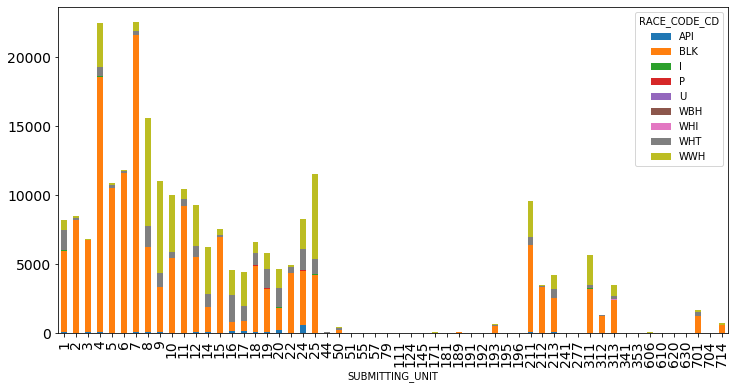

In [78]:
arrest_count.groupby(["SUBMITTING_UNIT","RACE_CODE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=14) 

In [79]:
# percentage of arrests - entire dataset

baseline_arrests = arrest_count[('TARGET')].value_counts(normalize=True) * 100
baseline_arrests

0    88.376952
1    11.623048
Name: TARGET, dtype: float64

In [80]:
first_emp_arrests = arrest_count.groupby('FO_EMPLOYEE_ID', as_index=False)['TARGET'].mean()
first_emp_arrests.sort_values(by='TARGET', ascending=False).head(10)

# interesting - some officers have 100% arrest rates
# they might only have one or two rows in this dataset
# let's limit this to officers that have 20 or more rows

,FO_EMPLOYEE_ID,TARGET
5955,831547,1.0
4267,608301,1.0
4238,604621,1.0
5638,791046,1.0
1153,165553,1.0
1786,253251,1.0
5155,726578,1.0
282,38836,1.0
3199,461201,1.0
3201,461308,1.0


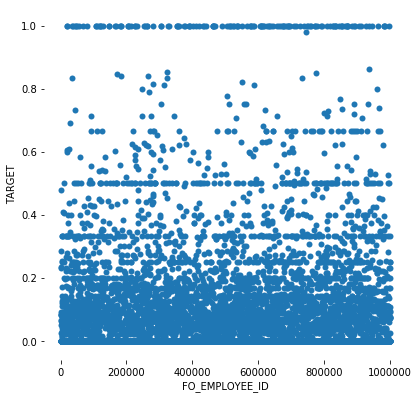

In [81]:
# scatterplot of employee arrest rates

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='FO_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=first_emp_arrests, ax=ax)

In [82]:
# exclude any officers that have 20 or fewer arrests

filtered = arrest_count.groupby('FO_EMPLOYEE_ID').filter(lambda x: len(x) >= 21)
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213478 entries, 0 to 290144
Data columns (total 8 columns):
SUBMITTING_UNIT       213478 non-null int64
SUBMITTING_BEAT_CD    213478 non-null object
CREATED_BY            213478 non-null int64
RACE_CODE_CD          213478 non-null object
FO_EMPLOYEE_ID        213478 non-null int64
SO_EMPLOYEE_ID        213478 non-null float64
SUPV_EMPLOYEE_ID      213478 non-null float64
TARGET                213478 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 14.7+ MB


In [108]:
filt_first_emp = filtered.groupby('FO_EMPLOYEE_ID', as_index=False)['TARGET'].mean()
highest_20 = filt_first_emp.sort_values(by='TARGET', ascending=False)[:20]
highest_20

,FO_EMPLOYEE_ID,TARGET
694,262036,1.000000
2002,742961,0.980769
2500,936724,0.861111
857,321618,0.852459
450,172179,0.847458
477,182526,0.840580
702,264134,0.840000
1468,550037,0.822430
749,280368,0.815385
841,315172,0.811765


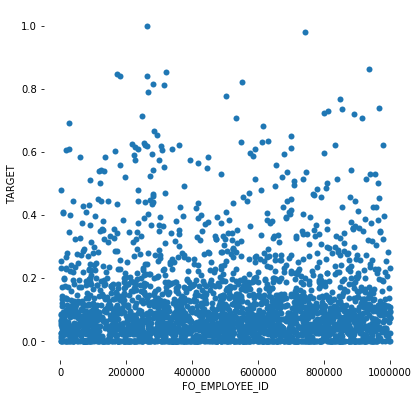

In [84]:
# here are all of the officers with more than 20 arrests

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='FO_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=filt_first_emp, ax=ax)



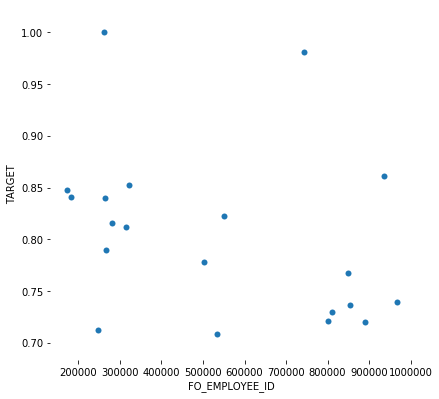

In [85]:
# highest_20 only

# here are all of the officers with more than 20 arrests

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='FO_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=highest_20, ax=ax)



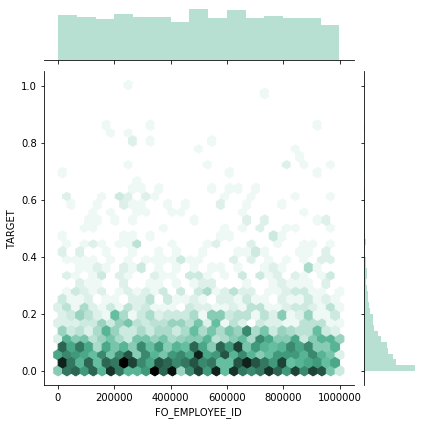

In [86]:
x = filt_first_emp['FO_EMPLOYEE_ID']
y = filt_first_emp['TARGET']

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [87]:
# let's repeat the same thing, but with supervisors

In [88]:
arrest_count['SUPV_EMPLOYEE_ID'].nunique()

1239

In [89]:
supv_arrests = arrest_count.groupby('SUPV_EMPLOYEE_ID', as_index=False)['TARGET'].mean()
supv_arrests.sort_values(by='TARGET', ascending=False).head(10)

,SUPV_EMPLOYEE_ID,TARGET
566,459073.0,1.0
766,616060.0,1.0
850,688690.0,1.0
274,212562.0,1.0
531,422310.0,1.0
873,703148.0,1.0
59,46235.0,1.0
667,532982.0,1.0
365,285934.0,1.0
815,651965.0,1.0


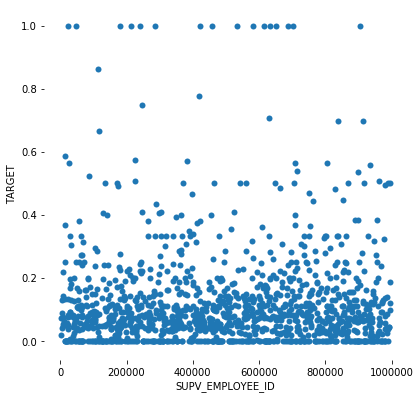

In [90]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='SUPV_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=supv_arrests, ax=ax)

In [91]:
filtered_supv = arrest_count.groupby('SUPV_EMPLOYEE_ID').filter(lambda x: len(x) >= 21)
filtered_supv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240822 entries, 0 to 290144
Data columns (total 8 columns):
SUBMITTING_UNIT       240822 non-null int64
SUBMITTING_BEAT_CD    240822 non-null object
CREATED_BY            240822 non-null int64
RACE_CODE_CD          240822 non-null object
FO_EMPLOYEE_ID        240822 non-null int64
SO_EMPLOYEE_ID        240822 non-null float64
SUPV_EMPLOYEE_ID      240822 non-null float64
TARGET                240822 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 16.5+ MB


In [92]:
filt_supv_arrests = filtered_supv.groupby('SUPV_EMPLOYEE_ID', as_index=False)['TARGET'].mean()
highest_20_supv = filt_supv_arrests.sort_values(by='TARGET', ascending=False).head(20)
highest_20_supv

,SUPV_EMPLOYEE_ID,TARGET
104,114341.0,0.860656
222,245635.0,0.748466
802,913839.0,0.698630
729,838875.0,0.697143
12,13429.0,0.587209
200,225434.0,0.574879
616,708954.0,0.565657
20,25330.0,0.565558
695,804918.0,0.563981
819,936333.0,0.557047


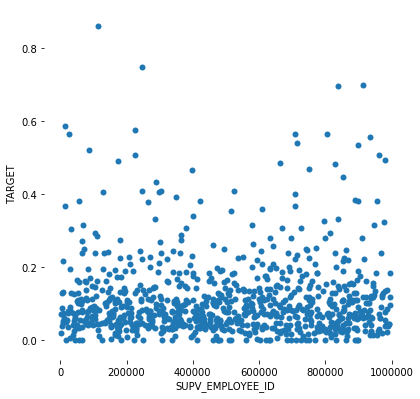

In [93]:
# here are all of the supervisors with more than 20 arrests

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='SUPV_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=filt_supv_arrests, ax=ax)

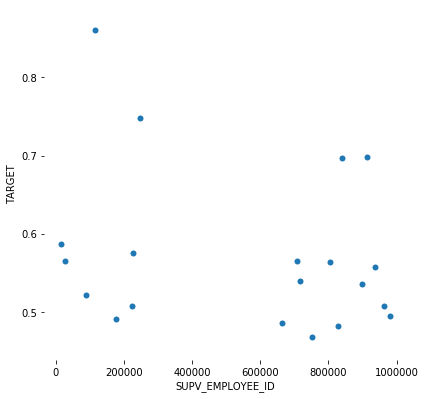

In [94]:
# highest_20_supv only

# here are all of the supervisors with more than 20 arrests

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='SUPV_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=highest_20_supv, ax=ax)

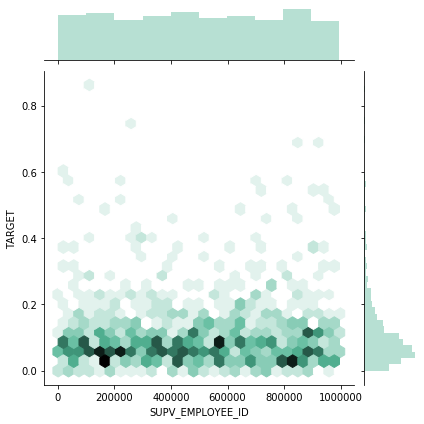

In [95]:
x = filt_supv_arrests['SUPV_EMPLOYEE_ID']
y = filt_supv_arrests['TARGET']

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [96]:
# check to see if this changes with greater than 100 arrests

filtered_supv_100 = arrest_count.groupby('SUPV_EMPLOYEE_ID').filter(lambda x: len(x) >= 101)
filtered_supv_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224190 entries, 0 to 290144
Data columns (total 8 columns):
SUBMITTING_UNIT       224190 non-null int64
SUBMITTING_BEAT_CD    224190 non-null object
CREATED_BY            224190 non-null int64
RACE_CODE_CD          224190 non-null object
FO_EMPLOYEE_ID        224190 non-null int64
SO_EMPLOYEE_ID        224190 non-null float64
SUPV_EMPLOYEE_ID      224190 non-null float64
TARGET                224190 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 15.4+ MB


In [97]:
filt_supv_arrests_100 = filtered_supv_100.groupby('SUPV_EMPLOYEE_ID', as_index=False)['TARGET'].mean()

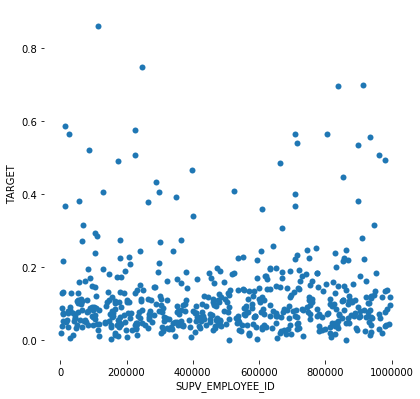

In [98]:
# here are the supervisors with more than 100 arrests

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='SUPV_EMPLOYEE_ID', y='TARGET',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=filt_supv_arrests_100, ax=ax)

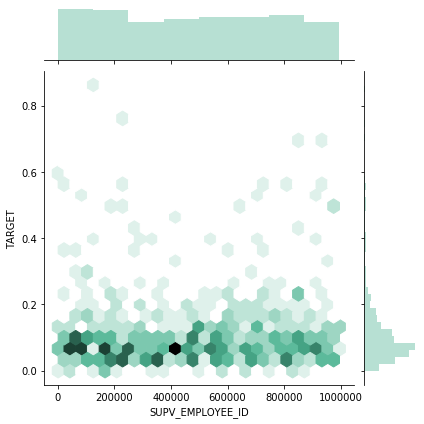

In [99]:
x = filt_supv_arrests_100['SUPV_EMPLOYEE_ID']
y = filt_supv_arrests_100['TARGET']

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [ ]:
# one last chart - count of arrests vs. mean target

In [ ]:
# list out 20 worst supervisors, officers
# target is "worst" list
# based on non-admin info, can we determine whether or not an arrest is from one of those 20?

In [111]:
# reset our index

highest_20.reset_index(drop=True, inplace=True)
highest_20

,FO_EMPLOYEE_ID,TARGET
0,262036,1.000000
1,742961,0.980769
2,936724,0.861111
3,321618,0.852459
4,172179,0.847458
5,182526,0.840580
6,264134,0.840000
7,550037,0.822430
8,280368,0.815385
9,315172,0.811765


In [114]:
officer_id_list = highest_20['FO_EMPLOYEE_ID'].tolist()
officer_id_list

[262036,
 742961,
 936724,
 321618,
 172179,
 182526,
 264134,
 550037,
 280368,
 315172,
 266758,
 503311,
 848820,
 966601,
 854212,
 810090,
 800075,
 890525,
 246726,
 533328]

In [119]:
df_arrests = df_clean.copy()

In [120]:
# create binary column for officer id (this will be the target)

df_arrests['HIGHEST_20_OFFICERS'] = np.isin(df_arrests['FO_EMPLOYEE_ID'], officer_id_list)
df_arrests.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,...,SEARCH_PROPERTY_I,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME,HIGHEST_20_OFFICERS
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,...,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,False
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,20410351,INVSTG,ISR000410351,01-JAN-2018 00:08,0,2523,N,"GRAY HOODED SWEATER, JEANS",NaN,JB100012,...,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,False
3,20410338,INVSTG,ISR000410338,01-JAN-2018 00:10,0,6738,N,"BLACK LONGSLEEVE SHIRT, GREY JEANS",Y,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORCHESTRA ALBANY,False
4,20410352,INVSTG,ISR000410352,01-JAN-2018 00:30,0,0767,N,"WHITE SOX HAT, BLACK JACKET, BLACK JEANS",Y,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
# can we build a model that predicts if the arrest was made by one of the 20 "worst" officers?

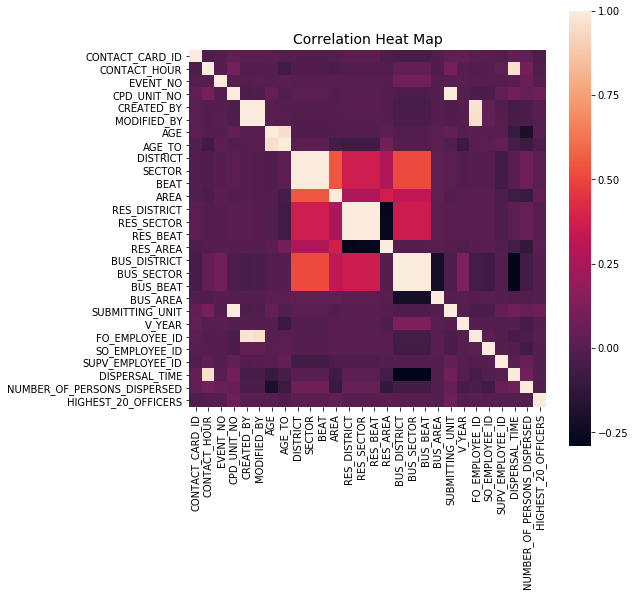

In [121]:
# correlation chart

corrmat = df_arrests.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

In [127]:
# remove columns with unit and beat identifying info, supervisor info, created by and modified by, etc.

df_arrests.drop(columns = ["CPD_UNIT_NO", "CREATED_BY", "MODIFIED_BY", "DISTRICT", "SECTOR", "BEAT", "RES_DISTRICT", "RES_SECTOR", "RES_BEAT"], axis=0, inplace=True)

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CREATED_DATE,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,AREA,RES_AREA,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,LOCATION_CD,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,INFORMATION_REFUSED_I,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,ALCOHOL_I,PARA_I,STOLEN_PROPERTY_I,SEARCH_PROPERTY_I,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME,HIGHEST_20_OFFICERS
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,01-JAN-2018 01:46,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,3,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,303,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,False
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,01-JAN-2018 01:35,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,3,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,289,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,20410351,INVSTG,ISR000410351,01-JAN-2018 00:08,0,2523,N,"GRAY HOODED SWEATER, JEANS",NaN,JB100012,NaN,121,NaN,01-JAN-2018 01:35,01-JAN-2018 01:36,23.0,NaN,M,WWH,508,170,MED,BRO,BAL,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,3,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,303,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,False
3,20410338,INVSTG,ISR000410338,01-JAN-2018 00:10,0,6738,N,"BLACK LONGSLEEVE SHIRT, GREY JEANS",Y,NaN,NaN,274,NaN,01-JAN-2018 01:01,NaN,23.0,NaN,M,WWH,508,220

In [128]:
# remove "duplicate" info - eg dispersal time and contact hour
df_arrests.drop(columns = ["DISPERSAL_TIME", "AGE_TO"], axis=0, inplace=True)

In [130]:
# still removing

df_arrests.drop(columns = ["SUBMITTING_UNIT", "FO_EMPLOYEE_ID", "SO_EMPLOYEE_ID", "SUPV_EMPLOYEE_ID"], axis=0, inplace=True)

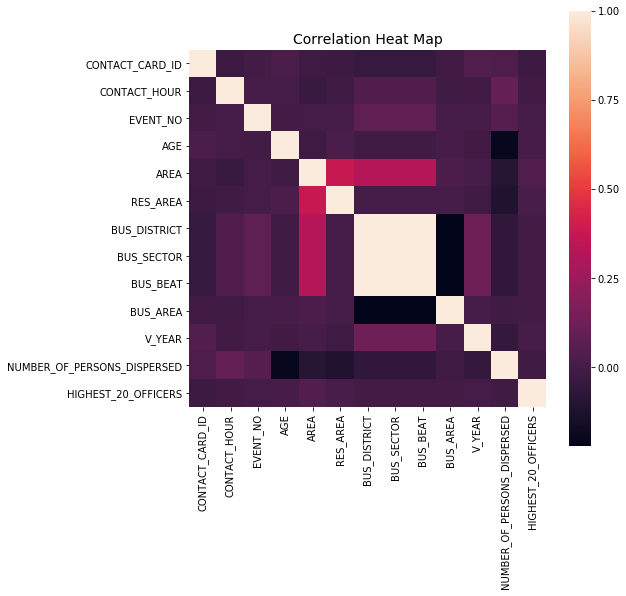

In [131]:
# correlation chart

corrmat = df_arrests.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

In [133]:
# also remove: CARD_NO, SUBMITTING_BEAT_CD, RD_NO, MODIFIED_DATE, STREET_NO, STREET_DIRECTION_CD, STREET_NME, CITY, STATE_CD, RES_AREA 

df_arrests.drop(columns = ["CARD_NO", "SUBMITTING_BEAT_CD", "RD_NO", "MODIFIED_DATE", "STREET_NO", "STREET_DIRECTION_CD", "STREET_NME", "CITY", "STATE_CD", "RES_AREA"], axis=0, inplace=True)

In [135]:
df_arrests.drop(columns = ["CLOTHING_DESCR", "EVENT_NO", "BUS_DISTRICT", "BUS_SECTOR", "BUS_BEAT", "BUS_AREA", "CONTACT_TYPE_DESCR"], axis=0, inplace=True)

In [137]:
df_arrests.drop(columns = ["CONTACT_CARD_ID", "CONTACT_DATE", "CONTACT_CARD_STATUS_CD", "LOCATION_CD"], axis=0, inplace=True)

In [139]:
df_arrests.drop(columns = ["V_YEAR", "MAKE_CD", "MAKE_DESCR", "STYLE_CD", "STYLE_DESCR", "MODEL_DESCR", "COLOR_TOP", "COLOR_BOTTOM"], axis=0, inplace=True)

In [142]:
df_arrests.drop(columns = ["FIREARM_I", "COCAINE_I", "COCAINE_AMOUNT", "HEROIN_I", "HEROIN_AMOUNT", "OTHER_WEAPON_I", "OTHER_WEAPON_DESCR", "CANNABIS_I", "CANNABIS_AMOUNT", "OTHER_CON_SUB_I", "OTHER_CON_SUB", "OTHER_CON_SUB_AMT"], axis=0, inplace=True)

In [144]:
df_arrests.drop(columns = ["SEARCH_CONTRABAND_FOUND_I","SEARCH_FIREARM_I", "SEARCH_COCAINE_I", "SEARCH_COCAINE_AMOUNT", "SEARCH_HEROIN_I", "SEARCH_HEROIN_AMOUNT", "SEARCH_OTHER_WEAPON_I", "SEARCH_OTHER_WEAPON_DESCR"], axis=0, inplace=True)

In [146]:
df_arrests.drop(columns = ["S_OTHER_DESCR", "S_OTHER_I", "OTHER_DESCR", "GANG_OTHER", "S_STOLEN_PROPERTY_I", "S_PARA_I", "S_ALCOHOL_I", "SEARCH_PROPERTY_I"], axis=0, inplace=True)

In [148]:
df_arrests.drop(columns = ["STOLEN_PROPERTY_I", "PARA_I", "SEARCH_OTHER_CON_SUB_DESCR", "SEARCH_OTHER_CON_SUB_AMT", "ENFORCEMENT_ID_NO"], axis=0, inplace=True)

In [149]:
df_arrests.head()

,CONTACT_TYPE_CD,CONTACT_HOUR,JUVENILE_I,NAME_VERIFIED_I,HOTSPOT_NO,MISSION_NO,CREATED_DATE,AGE,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,ZIP_CD,AREA,GANG,KNOWN_HANGOUT,FACTION_NAME,VEHICLE_INVOLVED_I,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,INFORMATION_REFUSED_I,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ALCOHOL_I,NAME,HIGHEST_20_OFFICERS
0,INVSTG,0,N,NaN,NaN,NaN,01-JAN-2018 01:46,30.0,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,60641,3,UNKNOWN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,False
1,INVSTG,0,N,NaN,NaN,NaN,01-JAN-2018 01:35,20.0,M,WWH,510,175,MED,BRO,BLK,MED,LBR,60641,3,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,NaN,NaN,NaN,False
2,INVSTG,0,N,NaN,NaN,NaN,01-JAN-2018 01:35,23.0,M,WWH,508,170,MED,BRO,BAL,SHORT,MED,60641,3,UNKNOWN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,False
3,INVSTG,0,N,Y,NaN,NaN,01-JAN-2018 01:01,23.0,M,WWH,508,220,HEA,BRO,BLK,SHAG,MBR,60634,3,NaN,NaN,DARWIN CITY,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,NaN,Y,Y,NaN,Y,N,N,NaN,NaN,NaN,NaN,VIEW,N,N,NaN,NaN,NaN,NaN,ORCHESTRA ALBANY,False
4,INVSTG,0,N,Y,NaN,NaN,01-JAN-2018 01:36,27.0,M,BLK,510,160,SLN,BRO,BLK,SHORT,MED,60621,2,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,NaN,NaN,NaN,Y,Y,Y,N,N,NaN,NaN,NaN,NaN,VIEW,Y,N,NaN,NaN,NaN,NaN,NaN,False


In [150]:
df_arrests.drop(columns = ["SEARCH_CANNABIS_AMOUNT"], axis=0, inplace=True)

In [151]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290145 entries, 0 to 290144
Data columns (total 59 columns):
CONTACT_TYPE_CD                  290145 non-null object
CONTACT_HOUR                     290145 non-null int64
JUVENILE_I                       290145 non-null object
NAME_VERIFIED_I                  126758 non-null object
HOTSPOT_NO                       9328 non-null object
MISSION_NO                       14198 non-null object
CREATED_DATE                     290145 non-null object
AGE                              289342 non-null float64
SEX_CODE_CD                      290145 non-null object
RACE_CODE_CD                     290145 non-null object
HEIGHT                           290145 non-null object
WEIGHT                           290145 non-null object
BUILD_CODE_CD                    290145 non-null object
EYE_COLOR_CODE_CD                290145 non-null object
HAIR_COLOR_CODE_CD               290145 non-null object
HAIR_STYLE_CODE_CD               290145 non-null obj

In [ ]:
# highest_20_officers becomes target

In [ ]:
# drop that column

In [ ]:
# NEXT STEPS

# for above info, keep race

In [ ]:
# next next steps

# time series for worst officers/supervisors
# ARIMA to predict number of arrests